In [50]:
import tensorflow as tf 
import matplotlib.pyplot as plt

In [51]:
import numpy as np
import pandas as pd

In [52]:
# Steps:
#     1.fetech dataset,split dataset,scale.
#     2.create arch of the model
#     3.compile the model (choose loss,optimizer,metrics)
#     4.fit the model (train the model)
#     5.evaluation
#     6.prediction

In [53]:
# Step : 1

In [73]:
mnistdata=tf.keras.datasets.mnist

In [74]:
(x_train_full,y_train_full),(x_test,y_test)=mnistdata.load_data()

In [75]:
x_val,x_train=x_train_full[:5000]/255,x_train_full[5000:]/255
y_val,y_train=y_train_full[:5000],y_train_full[5000:]


In [76]:
x_test=x_test/255

In [90]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

7

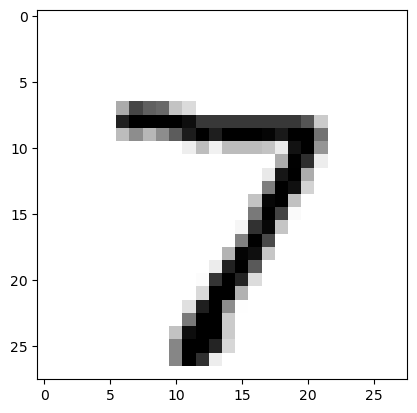

In [78]:
plt.imshow(x_test[0],cmap="binary")
y_test[0]

In [59]:
# Step : 2

In [79]:
Layers=[tf.keras.layers.Flatten(input_shape=(28,28),name="Inputlayer"),
        tf.keras.layers.Dense(300,activation="relu",name="hlayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="hlayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="outputlayer")
        ]
model_arch=tf.keras.models.Sequential(Layers)

In [61]:
#step 3

In [91]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]



In [81]:
model_arch.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hlayer1 (Dense)             (None, 300)               235500    
                                                                 
 hlayer2 (Dense)             (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
model_arch.compile(metrics=METRICS,optimizer=OPTIMIZER,loss=LOSS_FUNCTION)

In [94]:
# step 4
epochs=30
validation_data=(x_val,y_val)
batch_size=32

In [95]:
history=model_arch.fit(x_train,y_train,epochs=epochs,validation_data=validation_data,batch_size=32)

Epoch 1/30


1719/1719 [==============================] - 11s 5ms/step - loss: 0.6395 - accuracy: 0.8337 - val_loss: 0.3157 - val_accuracy: 0.9134
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2959 - accuracy: 0.9153 - val_loss: 0.2501 - val_accuracy: 0.9298
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2434 - accuracy: 0.9304 - val_loss: 0.2107 - val_accuracy: 0.9388
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2076 - accuracy: 0.9410 - val_loss: 0.1867 - val_accuracy: 0.9504
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1802 - accuracy: 0.9483 - val_loss: 0.1638 - val_accuracy: 0.9546
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1591 - accuracy: 0.9550 - val_loss: 0.1545 - val_accuracy: 0.9580
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1411 - accuracy: 0.9607 - val_loss: 0.1325 - val_accura

In [101]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.639455,0.833673,0.315725,0.9134
1,0.295882,0.915255,0.250055,0.9298
2,0.243436,0.930382,0.210737,0.9388
3,0.207629,0.941018,0.186748,0.9504
4,0.180248,0.948309,0.163809,0.9546
5,0.159066,0.954964,0.154482,0.9580
6,0.141053,0.960691,0.132535,0.9642
7,0.127010,0.963727,0.125782,0.9662
8,0.115217,0.967545,0.115249,0.9666
9,0.104874,0.970618,0.110402,0.9686


<Axes: >

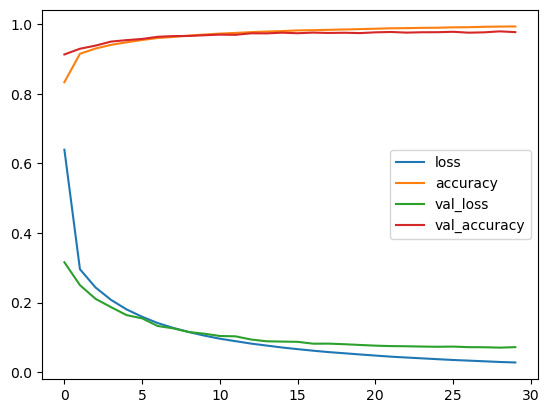

In [105]:
pd.DataFrame(history.history).plot()

In [106]:
model_arch.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0697 - accuracy: 0.9774


[0.06973085552453995, 0.977400004863739]

In [110]:
x=x_test[:3]


In [111]:
y_act=y_test[:3]
y_act

array([7, 2, 1], dtype=uint8)

In [112]:
y_pred=model_arch.predict(x)

1/1 [==============================] - 0s 89ms/step


In [115]:
y_pred=np.argmax(y_pred,axis=-1)

In [116]:
y_pred

array([7, 2, 1], dtype=int64)